In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, root_mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [134]:
data = pd.read_csv('../Data/processed_data.csv')
data

,Price,Mileage,Brand,Model,Automatic Transmission,Air Conditioner,Power Steering,Remote Control,Years_of_usage
0,14.845130,5.707110,59,738,True,True,True,True,0
1,13.997833,11.782960,32,789,True,True,True,True,3
2,14.533351,11.736077,47,805,True,True,True,True,3
3,14.533351,11.338584,5,842,True,True,True,True,6
4,13.458837,11.225257,18,618,True,True,True,True,3
...,...,...,...,...,...,...,...,...,...
21975,13.235694,11.751950,17,158,True,True,True,True,4
21976,13.664689,8.853808,76,743,True,True,True,True,0
21977,13.815512,12.429220,9,812,True,True,True,True,11
21978,15.110238,9.305741,5,65,True,True,True,True,1


In [135]:
X = data.drop(columns='Price')
y = data['Price']
y

0        14.845130
1        13.997833
2        14.533351
3        14.533351
4        13.458837
           ...    
21975    13.235694
21976    13.664689
21977    13.815512
21978    15.110238
21979    14.133965
Name: Price, Length: 21980, dtype: float64

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [137]:
model = RandomForestRegressor()

In [138]:
model.fit(X_train, y_train)

RandomForestRegressor()

In [139]:
y_pred = model.predict(X_test)

In [140]:
rmse = root_mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [141]:
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'R-squared: {r2:.2f}')

Root Mean Squared Error (RMSE): 0.30
Mean Absolute Error (MAE): 0.21
R-squared: 0.88


In [142]:
result = pd.DataFrame({'Y_k' : np.expm1(y_test) / 1000 ,
                       'Y_pred_k' : np.expm1(y_pred) / 1000})
result.head(20)

,Y_k,Y_pred_k
10534,6800.0,5339.365362
11227,250.0,467.069713
14319,1270.0,1646.878415
17615,820.0,672.621809
16922,2000.0,1050.953278
14855,460.0,342.009700
3643,4200.0,4098.469328
1595,1450.0,1180.953808
18046,450.0,393.982743
12528,850.0,907.068410


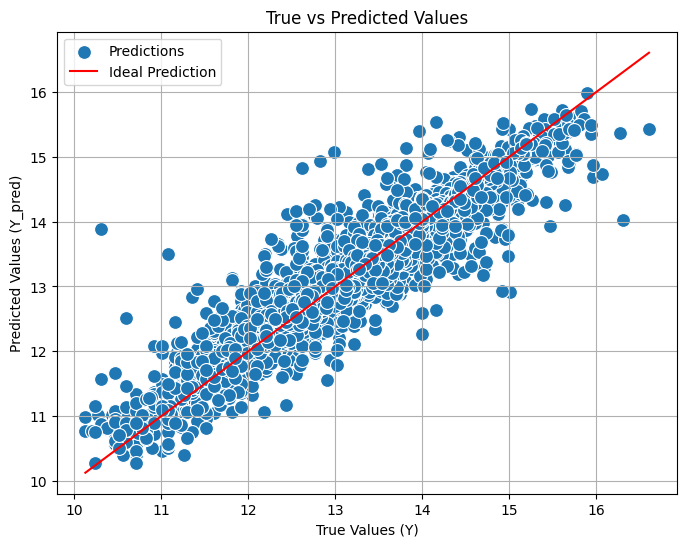

In [143]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, s=100, label='Predictions')
sns.lineplot(x=[min(y_test), max(y_test)], y=[min(y_test), max(y_test)], color='red',  label='Ideal Prediction')
plt.xlabel('True Values (Y)')
plt.ylabel('Predicted Values (Y_pred)')
plt.title('True vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

* # Add new values

In [144]:
n_Brand = input("Enter a car Brand")
n_Model = input("Enter a car Model")
n_year_of_make = int(input("Enter a car made year"))
n_Mileage = int(input("Enter How many KMs this car was driven"))
is_automatic = input("Is it Automatic Transmission? Y/N").lower()
is_air = input("Is it Air Conditioner? Y/N").lower()
is_power = input("Is it Power Steering? Y/N").lower()
is_remote = input("Is it Remote Control? Y/N").lower()

In [145]:
input_data = pd.DataFrame(
    {
        'Brand' : [n_Brand],
        'Model' : [n_Model],
        'n_year_of_make' : [n_year_of_make],
        'Mileage' : [n_Mileage],
        'Automatic Transmission' : [is_automatic],
        'Air Conditioner' : [is_air],
        'Power Steering' : [is_power],
        'Remote Control' : [is_remote]
    }
)

input_data

,Brand,Model,n_year_of_make,Mileage,Automatic Transmission,Air Conditioner,Power Steering,Remote Control
0,Kia,Sportage,2024,300,y,y,y,y


In [146]:
for col in ["Automatic Transmission", "Air Conditioner", "Power Steering", "Remote Control"]:
    input_data[col].replace({'y' : True, 'n' : False}, inplace=True)
input_data

C:\Users\20190\AppData\Local\Temp\ipykernel_34344\3054165006.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  input_data[col].replace({'y' : True, 'n' : False}, inplace=True)
C:\Users\20190\AppData\Local\Temp\ipykernel_34344\3054165006.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  input_dat

,Brand,Model,n_year_of_make,Mileage,Automatic Transmission,Air Conditioner,Power Steering,Remote Control
0,Kia,Sportage,2024,300,True,True,True,True


In [147]:
input_data["Mileage"] = np.log1p(input_data["Mileage"])
input_data

,Brand,Model,n_year_of_make,Mileage,Automatic Transmission,Air Conditioner,Power Steering,Remote Control
0,Kia,Sportage,2024,5.70711,True,True,True,True


In [148]:
input_data["Years_of_usage"] = 2024 - input_data["n_year_of_make"]
input_data.drop(columns="n_year_of_make", axis=1, inplace=True)
input_data

,Brand,Model,Mileage,Automatic Transmission,Air Conditioner,Power Steering,Remote Control,Years_of_usage
0,Kia,Sportage,5.70711,True,True,True,True,0


In [149]:
input_data[input_data["Years_of_usage"] < 0].replace({-1 : 0})

,Brand,Model,Mileage,Automatic Transmission,Air Conditioner,Power Steering,Remote Control,Years_of_usage


In [150]:
input_data

,Brand,Model,Mileage,Automatic Transmission,Air Conditioner,Power Steering,Remote Control,Years_of_usage
0,Kia,Sportage,5.70711,True,True,True,True,0


In [151]:
import joblib
loaded_label_encoder_Brand = joblib.load("../Preprocessing/label_encoder_Make.pkl")
loaded_label_encoder_Model = joblib.load("../Preprocessing/label_encoder_Model.pkl")

In [152]:
try:
    input_data["Brand"] = loaded_label_encoder_Brand.transform(input_data["Brand"])
    input_data["Model"] = loaded_label_encoder_Model.transform(input_data["Model"])
except:
    input_data["Brand"] = np.nan
    input_data["Model"] = np.nan

In [153]:
input_data

,Brand,Model,Mileage,Automatic Transmission,Air Conditioner,Power Steering,Remote Control,Years_of_usage
0,59,738,5.70711,True,True,True,True,0


In [154]:
input_data.dtypes

Brand                       int64
Model                       int64
Mileage                   float64
Automatic Transmission       bool
Air Conditioner              bool
Power Steering               bool
Remote Control               bool
Years_of_usage              int64
dtype: object

In [155]:
input_data = input_data[["Mileage", "Brand", "Model", 'Automatic Transmission','Air Conditioner','Power Steering','Remote Control','Years_of_usage']]
input_data

,Mileage,Brand,Model,Automatic Transmission,Air Conditioner,Power Steering,Remote Control,Years_of_usage
0,5.70711,59,738,True,True,True,True,0


In [156]:
n_y = model.predict(input_data)
print(f"The price of this car will be {round(np.expm1(n_y[0]))} EGP.")

The price of this car will be 2235969 EGP.
